In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/gddaslab/mxp140/tcr_project_ultimate')

In [3]:
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from probability import probability
from constants import max_kr_panpep
from mpl_toolkits.mplot3d import Axes3D
from joblib import Parallel, delayed

In [4]:
probability = np.vectorize(probability)

In [5]:
def neg_likelihood(
    params, clone_count_values, scaled_kr_values, verbose=False
):
    x1, x2  = params
    probs = probability(np.full(len(clone_count_values), x1), 
                        np.full(len(clone_count_values), x2),
                        scaled_kr_values,
                        clone_count_values)
    # Replace zero values with the smallest positive value allowed in Python
    # smallest_positive_value = np.finfo(float).eps
    # probabilities = np.where(probs == 0, smallest_positive_value, probs)
    probabilities = probs.copy()
    sum_log_probs = np.sum(np.log(probabilities))
    neg_sum = -sum_log_probs
    return neg_sum

In [11]:
data = pd.read_csv('/home/gddaslab/mxp140/tcr_project_ultimate/data/glioblastoma_data/PANPEP/BrMET008/BrMET008_region1.csv', sep=',')
# data = data[data['counts']>1]
clone_count_values = data['counts'].values
scaled_kr_values = data['kr'].values/max_kr_panpep
neg_likelihood([1.2, 1.3], clone_count_values=clone_count_values, scaled_kr_values=scaled_kr_values, verbose=False)

np.float64(1218.0545143826803)

In [23]:
10*np.arange(1, 12, 0.5)

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115.])

In [26]:
# Create a grid of x1 and x2 values
x1_range = 10*np.arange(1, 12, 0.1)  # Adjust range as needed
x2_range = x1_range
X1, X2 = np.meshgrid(x1_range, x2_range)

# # Calculate negative likelihood for each combination
Z = np.zeros_like(X1)
for i in tqdm.tqdm(range(len(x2_range))):
    for j in range(len(x1_range)):
        Z[i,j] = neg_likelihood(
            [X1[i,j], X2[i,j]], 
            clone_count_values=clone_count_values,
            scaled_kr_values=scaled_kr_values
        )

100%|██████████| 110/110 [12:34<00:00,  6.86s/it]


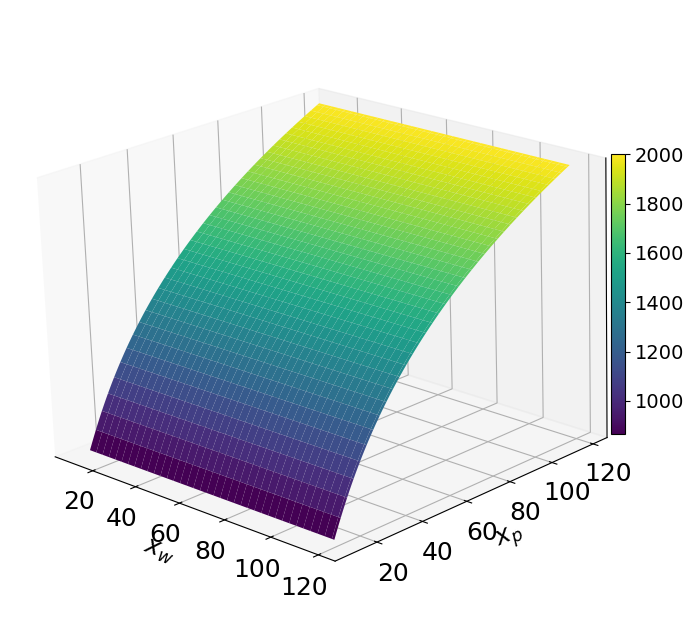

In [42]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surface = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=1.)

# Add labels and colorbar
ax.set_xlabel(r'$x_w$', fontsize=18)
ax.set_ylabel(r'$x_p$', fontsize=18)
# ax.set_zlabel(r'NLL', fontsize=18, rotation=90, labelpad=15)
ax.set_zticks([])
# Set tick label sizes and add padding
ax.tick_params(axis='z', which='major', direction='out', length=10, width=2, labelsize=18, pad=10)  # Add pad for gap
ax.tick_params(axis='z', which='minor', direction='out', length=5, width=2, labelsize=18, pad=10)  # Add pad for gap

# Customize tick parameters
ax.tick_params(axis="x", which="major", direction="out", length=10, width=2, labelsize=18)
ax.tick_params(axis="x", which="minor", direction="out", length=5, width=2, labelsize=18)
ax.tick_params(axis="y", which="major", direction="out", length=10, width=2, labelsize=18)
ax.tick_params(axis="y", which="minor", direction="out", length=5, width=2, labelsize=18)
ax.tick_params(axis="z", which="major", direction="out", length=10, width=2, labelsize=18)  # Added for z-axis


for spine in ax.spines.values():
    spine.set_linewidth(2.5)

# Add colorbar
cbar = fig.colorbar(surface, ax=ax)
cbar.ax.tick_params(labelsize=14)  # Set colorbar tick label size
cbar.ax.set_position([0.73, 0.35, 0.05, 0.35])
# cbar.set_ticks([600, 800, 1000, 1200, 1400])

ax.view_init(elev=20, azim=-45, roll=2, vertical_axis='z')

# plt.tight_layout()
# plt.savefig(f'fig_SF1_BrMET008-1.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [14]:
# Create a grid of x1 and x2 values
x1_fixed = 10  # Adjust range as needed
x2_range = np.linspace(1, 10, 500)  # Adjust range as needed

new_Z = np.zeros_like(x2_range)
for i in tqdm.tqdm(range(len(x2_range))):
        new_Z[i] = neg_likelihood(
            [x1_fixed, x2_range[i]],
            clone_count_values=clone_count_values,
            scaled_kr_values=scaled_kr_values
        )

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


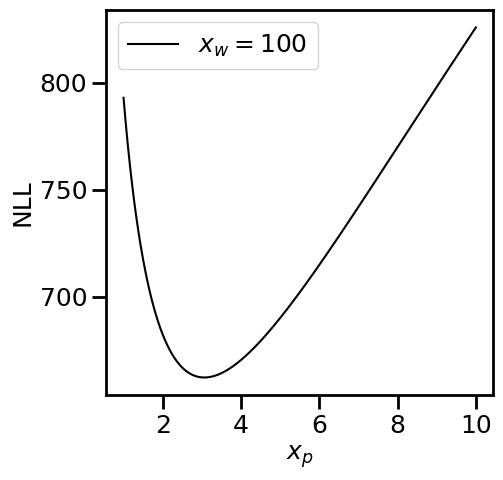

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(x2_range, new_Z, 'k-', label=r'$x_w=100$')
ax.set_xlabel(r'$x_p$', fontsize=18)
ax.set_ylabel('NLL', fontsize=18)

for label in ax.get_xticklabels():
    label.set_fontsize(18)
for label in ax.get_yticklabels():
    label.set_fontsize(18)

ax.tick_params(
    axis="x", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="x", which="minor", direction="out", length=5, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="major", direction="out", length=10, width=2, labelsize=18
)
ax.tick_params(
    axis="y", which="minor", direction="out", length=5, width=2, labelsize=18
)

for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.legend(loc='best', fontsize=18)
plt.show()

In [11]:
new_Z[:5]

array([793.00118433, 793.00118433, 793.00118433, 793.00118433,
       793.00118433])

In [12]:
x2_range[:5]

array([1.        , 1.01803607, 1.03607214, 1.05410822, 1.07214429])

In [63]:
np.sum([np.log(probability(100, 1.1,
                        scaled_kr_values[i],
                        clone_count_values[i])) for i in range(len(clone_count_values))])

np.float64(-772.6385008985956)

In [67]:
neg_likelihood(
            [x1_fixed, 1.1],
            clone_count_values=clone_count_values,
            scaled_kr_values=scaled_kr_values
        )

np.float64(793.0011843294201)

In [68]:
from minimization import new_neg_likelihood

In [74]:
new_neg_likelihood([1.3], x1_fixed,
            clone_count_values=clone_count_values,
            scaled_kr_values=scaled_kr_values
        )

np.float64(740.7145896745376)